In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pywaffle import Waffle


In [2]:
df_health = pd.read_csv ('KaggleV2-May-2016.csv')

In [3]:
df_health. head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
group_gender_noshow = df_health.groupby (['Gender','No-show'])
count_gendersohow= group_gender_noshow.size ().reset_index (name='count')
count_gendersohow

,Gender,No-show,count
0,F,No,57246
1,F,Yes,14594
2,M,No,30962
3,M,Yes,7725


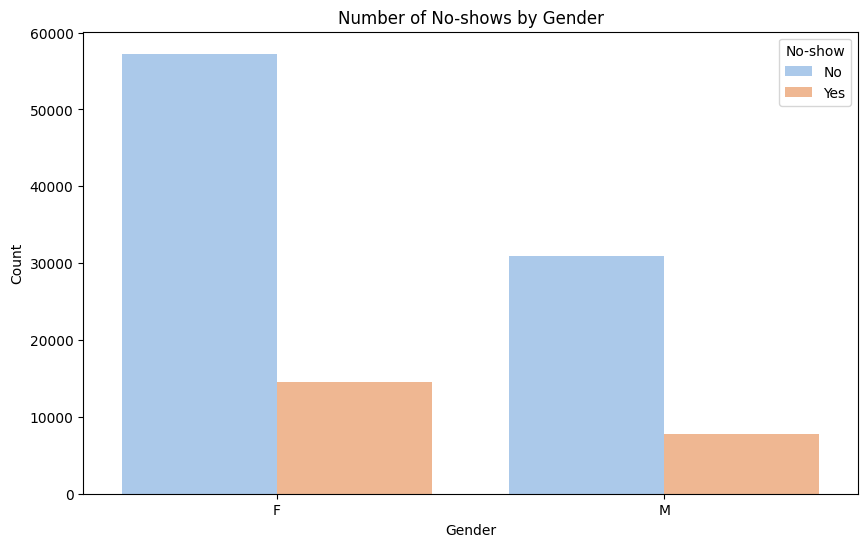

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='count', hue='No-show', data=count_gendersohow, palette='pastel')

# title
plt.title('Number of No-shows by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')


plt.show()

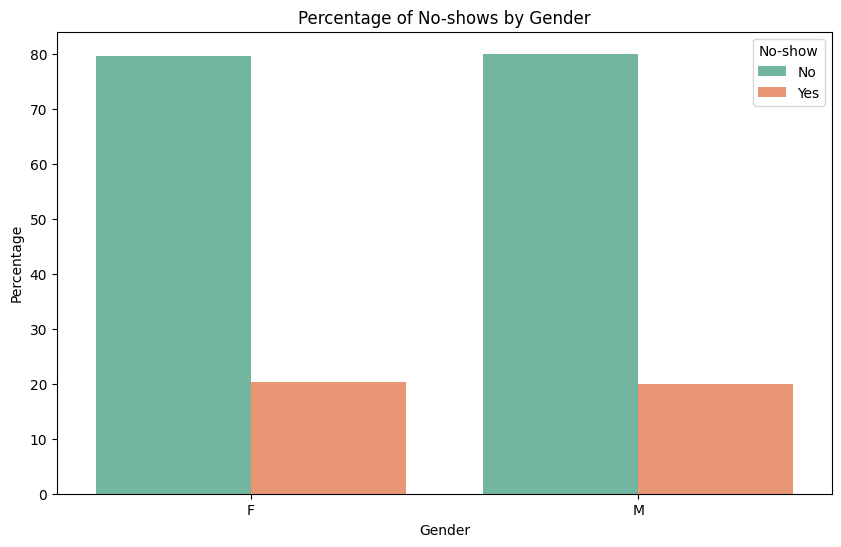

In [23]:
Total_counts = count_gendersohow.groupby('Gender')['count'].transform('sum')

# %
count_gendersohow['Percentage'] = (count_gendersohow['count'] / total_counts) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Percentage', hue='No-show', data=count_gendersohow, palette='Set2')

# title
plt.title('Percentage of No-shows by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')


plt.show()

In [31]:
# total count
total_hipertension_count = df_health['Hipertension'].sum()

# Hipertension who showed up
showed_up_with_hipertension_count = df_health[(df_health['No-show'] == 'No') & (df_health['Hipertension'] == 1)].shape[0]

#  Hipertension who did not show up
no_show_with_hipertension_count = df_health[(df_health['No-show'] == 'Yes') & (df_health['Hipertension'] == 1)].shape[0]

# Calculate percentage
percentage_show = (showed_up_with_hipertension_count / total_hipertension_count) * 100
percentage_no_show = (no_show_with_hipertension_count / total_hipertension_count) * 100

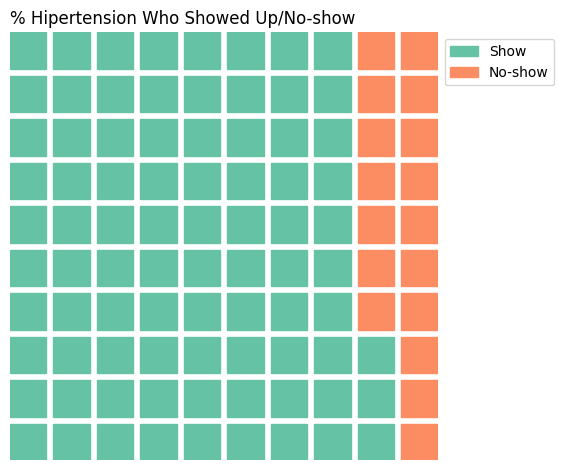

In [80]:
data = {'Show': percentage_show, 'No-show': percentage_no_show}

# colors
custom_palette = sns.color_palette("Set2", n_colors=len(data))

# Create a waffle plot
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  # it works good with 10
    values=data,
    colors=custom_palette,
    title={'label': '% Hipertension Who Showed Up/No-show', 'loc': 'left'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    
)

total = sum(data.values())
percentages = {key: value / total * 100 for key, value in data.items()}


plt.show()

In [81]:
#  Total  Hipertension
total_hipertension_count = df_health['Diabetes'].sum()

#  Hipertension who showed up
showed_up_with_hipertension_count = df_health[(df_health['No-show'] == 'No') & (df_health['Diabetes'] == 1)].shape[0]

#  Hipertension who did not show up
no_show_with_hipertension_count = df_health[(df_health['No-show'] == 'Yes') & (df_health['Diabetes'] == 1)].shape[0]

# %
percentage_show = (showed_up_with_hipertension_count / total_hipertension_count) * 100
percentage_no_show = (no_show_with_hipertension_count / total_hipertension_count) * 100

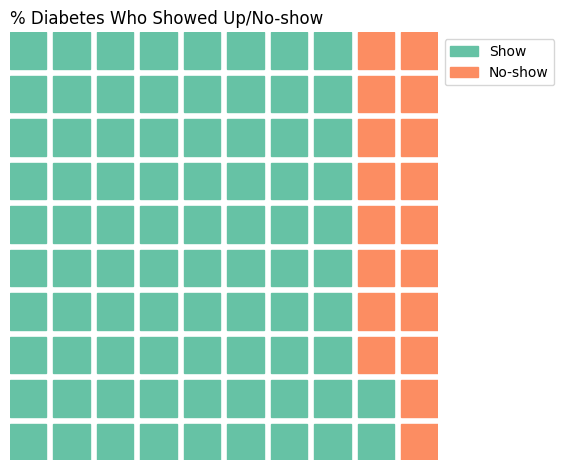

In [82]:
data = {'Show': percentage_show, 'No-show': percentage_no_show}

# colors
custom_palette = sns.color_palette("Set2", n_colors=len(data))

# Create a waffle plot with the custom palette
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  # 10 it's good
    values=data,
    colors=custom_palette,
    title={'label': '% Diabetes Who Showed Up/No-show', 'loc': 'left'},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    #icons='child',  
    #icon_legend=True,  
)
# Calculate the percentages
total = sum(data.values())
percentages = {key: value / total * 100 for key, value in data.items()}


plt.show()

In [5]:

correlation_matrix = df_health[['Age', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']].corr()


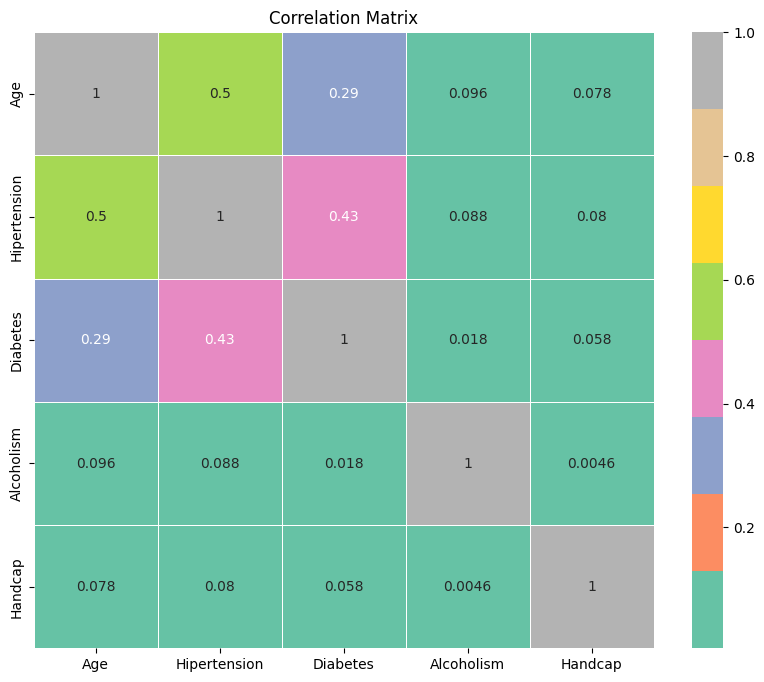

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Set2', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
contingency_table = pd.crosstab(df_health['No-show'], df_health['Gender'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")

Chi-squared: 1.8534369792394627
P-value: 0.17338418189785987


/Users/joel/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joel/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joel/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/joel/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

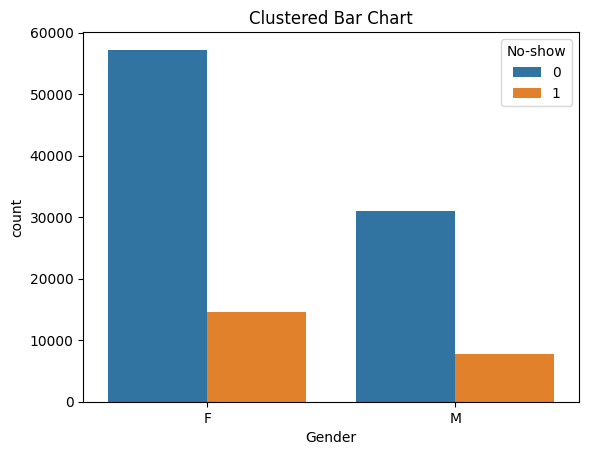

In [10]:
X = pd.get_dummies(df_health[['Age', 'Gender']], columns=['Gender'], drop_first=True)


y = (df_health['No-show'] == 'Yes').astype(int)

#split trainig data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

# Display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



/Users/joel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joel/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
